<a href="https://colab.research.google.com/github/MinhNhata/BTVN_1_19146227_MinhNhat/blob/main/water_level_control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 17.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=f2b090defff4394d0b7e4c5bc3625bdafe24d0368c0c9d82c7a36663a073d982
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


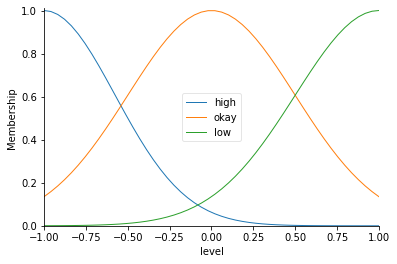

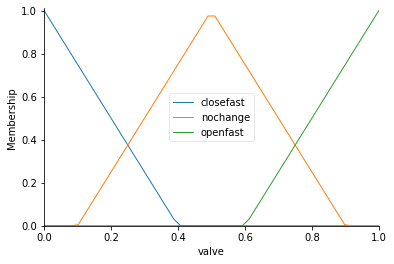

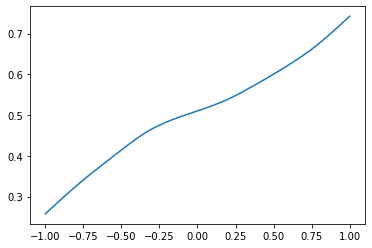

In [7]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

universe = np.linspace(-1, 1, 50)
universe1 = np.linspace(0, 1, 50)
level = ctrl.Antecedent(universe, 'level')

valve = ctrl.Consequent(universe1, 'valve')
#mucnuoc
level['high'] = fuzzy.gaussmf(level.universe,-1,0.4247)
level['okay'] = fuzzy.gaussmf(level.universe,0,0.5)
level['low'] = fuzzy.gaussmf(level.universe,1,0.5)

#tocdovan
valve['closefast'] = fuzzy.trimf(valve.universe,[0,0,0.4])
valve['nochange'] = fuzzy.trimf(valve.universe,[0.1,0.5,0.9])
valve['openfast'] = fuzzy.trimf(valve.universe,[0.6,1,1])


rule1 = ctrl.Rule(antecedent = (level['okay']), consequent = (valve['nochange']))
rule2 = ctrl.Rule(antecedent = (level['low']), consequent = (valve['openfast']))
rule3 = ctrl.Rule(antecedent = (level['high']), consequent = (valve['closefast']))

level.view()
valve.view()

System  = ctrl.ControlSystem(rules = [rule1, rule2, rule3])
sim = ctrl.ControlSystemSimulation(System)
x = np.linspace(-1, 1, 100)
y = np.zeros_like(x)
for i in range(100):
  sim.input['level'] = x[i]
  sim.compute()
  y[i] = sim.output['valve']

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(x, y)